In [1]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

import numpy as np
import pandas as pd
import glob
from sklearn.metrics import r2_score
from IPython.display import display, HTML
from datetime import datetime
import os
import h5py

import matplotlib as mpl

# 1. process hdf vector

In [2]:
viirs_key = 'VNP' #VNP or or 'VJ1'

output = []
lake_num   = 164
lake_ids   = range(1,165) #[float(c) for c in hf.attrs['LAKE_IDs'].decode("utf-8").split(',')]

files = glob.glob('./VNP28C3/VNP28C3*.h5', recursive=True)# look for input files

for fname in files:
    mdate = fname.split('/')[-1].split('.')[1]
    with h5py.File(fname, 'r') as hf:
        mdata=hf['lake_evaporation']
        print( fname, mdata)     
        for i in range(lake_num):
            output.append([mdate, lake_ids[i], mdata[i][3],mdata[i][6]])#lake area
            
df = pd.DataFrame(output, columns=['date', 'lake_id', 'pge698_area','lake_evap_rate'])
display(df)

./VNP28C3\VNP28C3.A2012032.002.2021266022228.h5 <HDF5 dataset "lake_evaporation": shape (164,), type "|V72">
./VNP28C3\VNP28C3.A2012061.002.2021266022228.h5 <HDF5 dataset "lake_evaporation": shape (164,), type "|V72">
./VNP28C3\VNP28C3.A2012092.002.2021266022228.h5 <HDF5 dataset "lake_evaporation": shape (164,), type "|V72">
./VNP28C3\VNP28C3.A2012122.002.2021266022228.h5 <HDF5 dataset "lake_evaporation": shape (164,), type "|V72">
./VNP28C3\VNP28C3.A2012153.002.2021266022228.h5 <HDF5 dataset "lake_evaporation": shape (164,), type "|V72">
./VNP28C3\VNP28C3.A2012183.002.2021266022228.h5 <HDF5 dataset "lake_evaporation": shape (164,), type "|V72">
./VNP28C3\VNP28C3.A2012214.002.2021266022228.h5 <HDF5 dataset "lake_evaporation": shape (164,), type "|V72">
./VNP28C3\VNP28C3.A2012245.002.2021266022228.h5 <HDF5 dataset "lake_evaporation": shape (164,), type "|V72">
./VNP28C3\VNP28C3.A2012275.002.2021266022228.h5 <HDF5 dataset "lake_evaporation": shape (164,), type "|V72">
./VNP28C3\VNP28C3.A

./VNP28C3\VNP28C3.A2018182.002.2021266022228.h5 <HDF5 dataset "lake_evaporation": shape (164,), type "|V72">
./VNP28C3\VNP28C3.A2018213.002.2021266022228.h5 <HDF5 dataset "lake_evaporation": shape (164,), type "|V72">
./VNP28C3\VNP28C3.A2018244.002.2021266022228.h5 <HDF5 dataset "lake_evaporation": shape (164,), type "|V72">
./VNP28C3\VNP28C3.A2018274.002.2021266022228.h5 <HDF5 dataset "lake_evaporation": shape (164,), type "|V72">
./VNP28C3\VNP28C3.A2018305.002.2021266022228.h5 <HDF5 dataset "lake_evaporation": shape (164,), type "|V72">
./VNP28C3\VNP28C3.A2018335.002.2021266022228.h5 <HDF5 dataset "lake_evaporation": shape (164,), type "|V72">
./VNP28C3\VNP28C3.A2019001.002.2021266022228.h5 <HDF5 dataset "lake_evaporation": shape (164,), type "|V72">
./VNP28C3\VNP28C3.A2019032.002.2021266022228.h5 <HDF5 dataset "lake_evaporation": shape (164,), type "|V72">
./VNP28C3\VNP28C3.A2019060.002.2021266022228.h5 <HDF5 dataset "lake_evaporation": shape (164,), type "|V72">
./VNP28C3\VNP28C3.A

date  lake_id  pge698_area  lake_evap_rate
0      A2012032        1 -9999.000000        0.000000
1      A2012032        2  7156.076172        7.488582
2      A2012032        3  4396.424316        3.821945
3      A2012032        4  5206.545898        3.949687
4      A2012032        5 -9999.000000        0.000000
...         ...      ...          ...             ...
19511  A2021335      160    12.450203        0.970265
19512  A2021335      161    33.701412        5.427375
19513  A2021335      162    49.371494        5.541621
19514  A2021335      163    20.392574        3.707252
19515  A2021335      164    30.481531        3.490823

[19516 rows x 4 columns]

In [3]:
date_start = datetime.strptime('1/1/2012', "%m/%d/%Y")  ## any date before the start of VIIRS is good

def sum_area(group):
    
    if np.min(group['pge698_area'] == 0):
        c = 0
    else:
        c = np.sum(group['pge698_area'])
    print(group['pge698_area'])    
    return c

df['date'] = pd.to_datetime(df['date'], format='A%Y%j', errors='coerce')
df['date_int'] = df['date'].apply(lambda x: (x-date_start).days)
df['days_in_month'] = df['date'].apply(lambda x: (x+pd.DateOffset(months=1)-x).days)
df = df.sort_values(['lake_id', 'date'])
display(df)
df.to_csv(viirs_key+'28C3_update.csv',index=False)


date  lake_id   pge698_area  lake_evap_rate  date_int  \
0     2012-02-01        1  -9999.000000        0.000000        31   
164   2012-03-01        1  -9999.000000        0.233788        60   
328   2012-04-01        1  -9999.000000        1.494593        91   
492   2012-05-01        1  30550.867188        3.502830       121   
656   2012-06-01        1  32176.261719        4.900636       152   
...          ...      ...           ...             ...       ...   
18859 2021-08-01      164     26.188358        1.266613      3500   
19023 2021-09-01      164     31.554825        1.709065      3531   
19187 2021-10-01      164     30.266872        1.872260      3561   
19351 2021-11-01      164     32.842777        2.312490      3592   
19515 2021-12-01      164     30.481531        3.490823      3622   

       days_in_month  
0                 29  
164               31  
328               30  
492               31  
656               30  
...              ...  
18859             31  
19023             30  
19187             31  
19351             30  
19515             31  

[19516 rows x 6 columns]

# 2. remove outliers and interpolate

In [4]:

def remove_bias(values, dates, wz):
    
    ## values: area or storage time series
    ## dates: corresponding dates (in integer)
    ## wz: windows size for calculating the moving average to determine the outliers
    
    weight = np.arange(1,wz,1)[int(wz/2):]
    weight = np.concatenate((weight, np.ones(len(values)-wz+1)*wz, np.flip(weight, 0)))/wz
    
    nol = 2
    limit = 50
    while nol > 0 and limit > 0:
        wt_ma = np.convolve(values, np.ones((wz,))/wz, mode='same')
        
        bias = values - wt_ma/weight
        b_avg = np.average(bias)
        b_sd = np.std(bias)
        
        outlier = [0 if (x >= b_avg+3*b_sd or x <= b_avg-3*b_sd) else 1 for x in bias]
        inreduce = nol - (len(outlier) - np.sum(outlier))
        nol = len(outlier) - np.sum(outlier)
        limit = limit - 1
        #print(nol)
        
        n_dates = [x for x,y in zip(dates, outlier) if y==1]
        n_enh = [x for x,y in zip(values, outlier) if y==1]
        if len(n_dates) >= 5:
            values = np.interp(dates, n_dates, n_enh)
        else:
            return dates, values
        
        if inreduce == 0 and nol <=2:
            break
    return n_dates, n_enh

In [5]:
lake_info_data = pd.read_table('./viirs_lake_info.txt', sep=' ')

In [6]:
wz = 7 # moving window
wz1 = 5 # moving window for evaporation rate

output_intp = []
for lake_id, group in df.groupby('lake_id'):
    
    lake_info = lake_info_data[lake_info_data['LAKE_ID'] == lake_id].iloc[0]
    sto_cap_km3, area_cap_km2, elev_cap_m, a, b = lake_info[['sto_cap_km3','area_cap_km2', 'elev_cap_m', 'a', 'b']]
    
    group_valid = group[(group['pge698_area'] > 0)]

    
    if len(group_valid) > wz:
        areas = group_valid['pge698_area'].values
        dates = group_valid['date_int'].values
        dates_new, areas_new = remove_bias(areas, dates, wz)
        
        areas_intp = np.interp(group['date_int'], dates_new, areas_new)
        print(lake_id,areas.shape,len(areas_new),areas_intp.shape)
        print(lake_id,dates.shape,len(dates_new),group['date_int'].shape)
    else:
        areas_new = group[(group['pge698_area'] > 0)]['pge698_area'].values
        dates_new = group[(group['pge698_area'] > 0)]['date_int'].values
        areas_intp = np.interp(group['date_int'], dates_new, areas_new)
      
        
    elevs_intp = [a*area+b for area in areas_intp]
    stors_intp = [sto_cap_km3 - (area_cap_km2+area)*(elev_cap_m-elev)/2000. 
                  for area, elev in zip(areas_intp, elevs_intp)]
    
    intp_flag = [0 if area==area_new else 1 for area, area_new in zip(group['pge698_area'], areas_intp)]
    
    erates = group['lake_evap_rate'].values
    dates = group['date_int'].values
    days = group['days_in_month'].values
    
    
    dates_new, erates_new = remove_bias(erates, dates, wz1)
    erates_intp = np.interp(dates, dates_new, erates_new)
    evols_intp = [a*b*c/1000 for a,b,c in zip(erates_intp, areas_intp, days)] ## million m3 per month
    
    group_new = pd.DataFrame({'date': group['date'], 'lake_area': areas_intp, 'lake_elevation': elevs_intp,
                        'lake_storage': stors_intp, 'intp_flag': intp_flag, 'lake_evap_rate': erates_intp,
                        'lake_evap_vol': evols_intp})
    group_new['lake_ID'] = lake_id
    output_intp.append(group_new)
    
df_intp = pd.concat(output_intp, axis=0).reset_index(drop=True)
display(df_intp)
df_intp.to_csv(viirs_key+'28C3_outlier_removed_old.csv', index=False)

1 (82,) 82 (119,)
1 (82,) 82 (119,)
2 (119,) 119 (119,)
2 (119,) 119 (119,)
3 (119,) 119 (119,)
3 (119,) 119 (119,)
4 (119,) 119 (119,)
4 (119,) 119 (119,)
5 (79,) 77 (119,)
5 (79,) 77 (119,)
6 (78,) 77 (119,)
6 (78,) 77 (119,)
7 (119,) 119 (119,)
7 (119,) 119 (119,)
8 (40,) 40 (119,)
8 (40,) 40 (119,)
9 (63,) 63 (119,)
9 (63,) 63 (119,)
10 (119,) 119 (119,)
10 (119,) 119 (119,)
11 (64,) 62 (119,)
11 (64,) 62 (119,)
12 (63,) 63 (119,)
12 (63,) 63 (119,)
13 (119,) 119 (119,)
13 (119,) 119 (119,)
14 (99,) 97 (119,)
14 (99,) 97 (119,)
15 (63,) 63 (119,)
15 (63,) 63 (119,)
16 (51,) 51 (119,)
16 (51,) 51 (119,)
17 (44,) 43 (119,)
17 (44,) 43 (119,)
18 (119,) 117 (119,)
18 (119,) 117 (119,)
19 (67,) 67 (119,)
19 (67,) 67 (119,)
20 (119,) 118 (119,)
20 (119,) 118 (119,)
21 (83,) 83 (119,)
21 (83,) 83 (119,)
22 (67,) 67 (119,)
22 (67,) 67 (119,)
23 (119,) 119 (119,)
23 (119,) 119 (119,)
24 (118,) 116 (119,)
24 (118,) 116 (119,)
25 (116,) 114 (119,)
25 (116,) 114 (119,)
26 (66,) 65 (119,)
26 (6

date     lake_area  lake_elevation  lake_storage  intp_flag  \
0     2012-02-01  30550.867188      449.220271  23374.847783          1   
1     2012-03-01  30550.867188      449.220271  23374.847783          1   
2     2012-04-01  30550.867188      449.220271  23374.847783          1   
3     2012-05-01  30550.867188      449.220271  23374.847783          0   
4     2012-06-01  32176.261719      456.479806  23602.532687          0   
...          ...           ...             ...           ...        ...   
19511 2021-08-01     26.188358      167.001943      0.448693          0   
19512 2021-09-01     31.554825      168.923343      0.504166          0   
19513 2021-10-01     30.266872      168.462207      0.489912          0   
19514 2021-11-01     32.842777      169.384480      0.519015          0   
19515 2021-12-01     30.481531      168.539063      0.492247          0   

       lake_evap_rate  lake_evap_vol  lake_ID  
0            0.000000       0.000000        1  
1            0.233788     221.415576        1  
2            1.494593    1369.833062        1  
3            3.502830    3317.449119        1  
4            4.900636    4730.524125        1  
...               ...            ...      ...  
19511        1.266613       1.028286      164  
19512        1.709065       1.617877      164  
19513        1.872260       1.756691      164  
19514        2.312490       2.278458      164  
19515        3.490823       3.298575      164  

[19516 rows x 8 columns]

# 3. check lakes

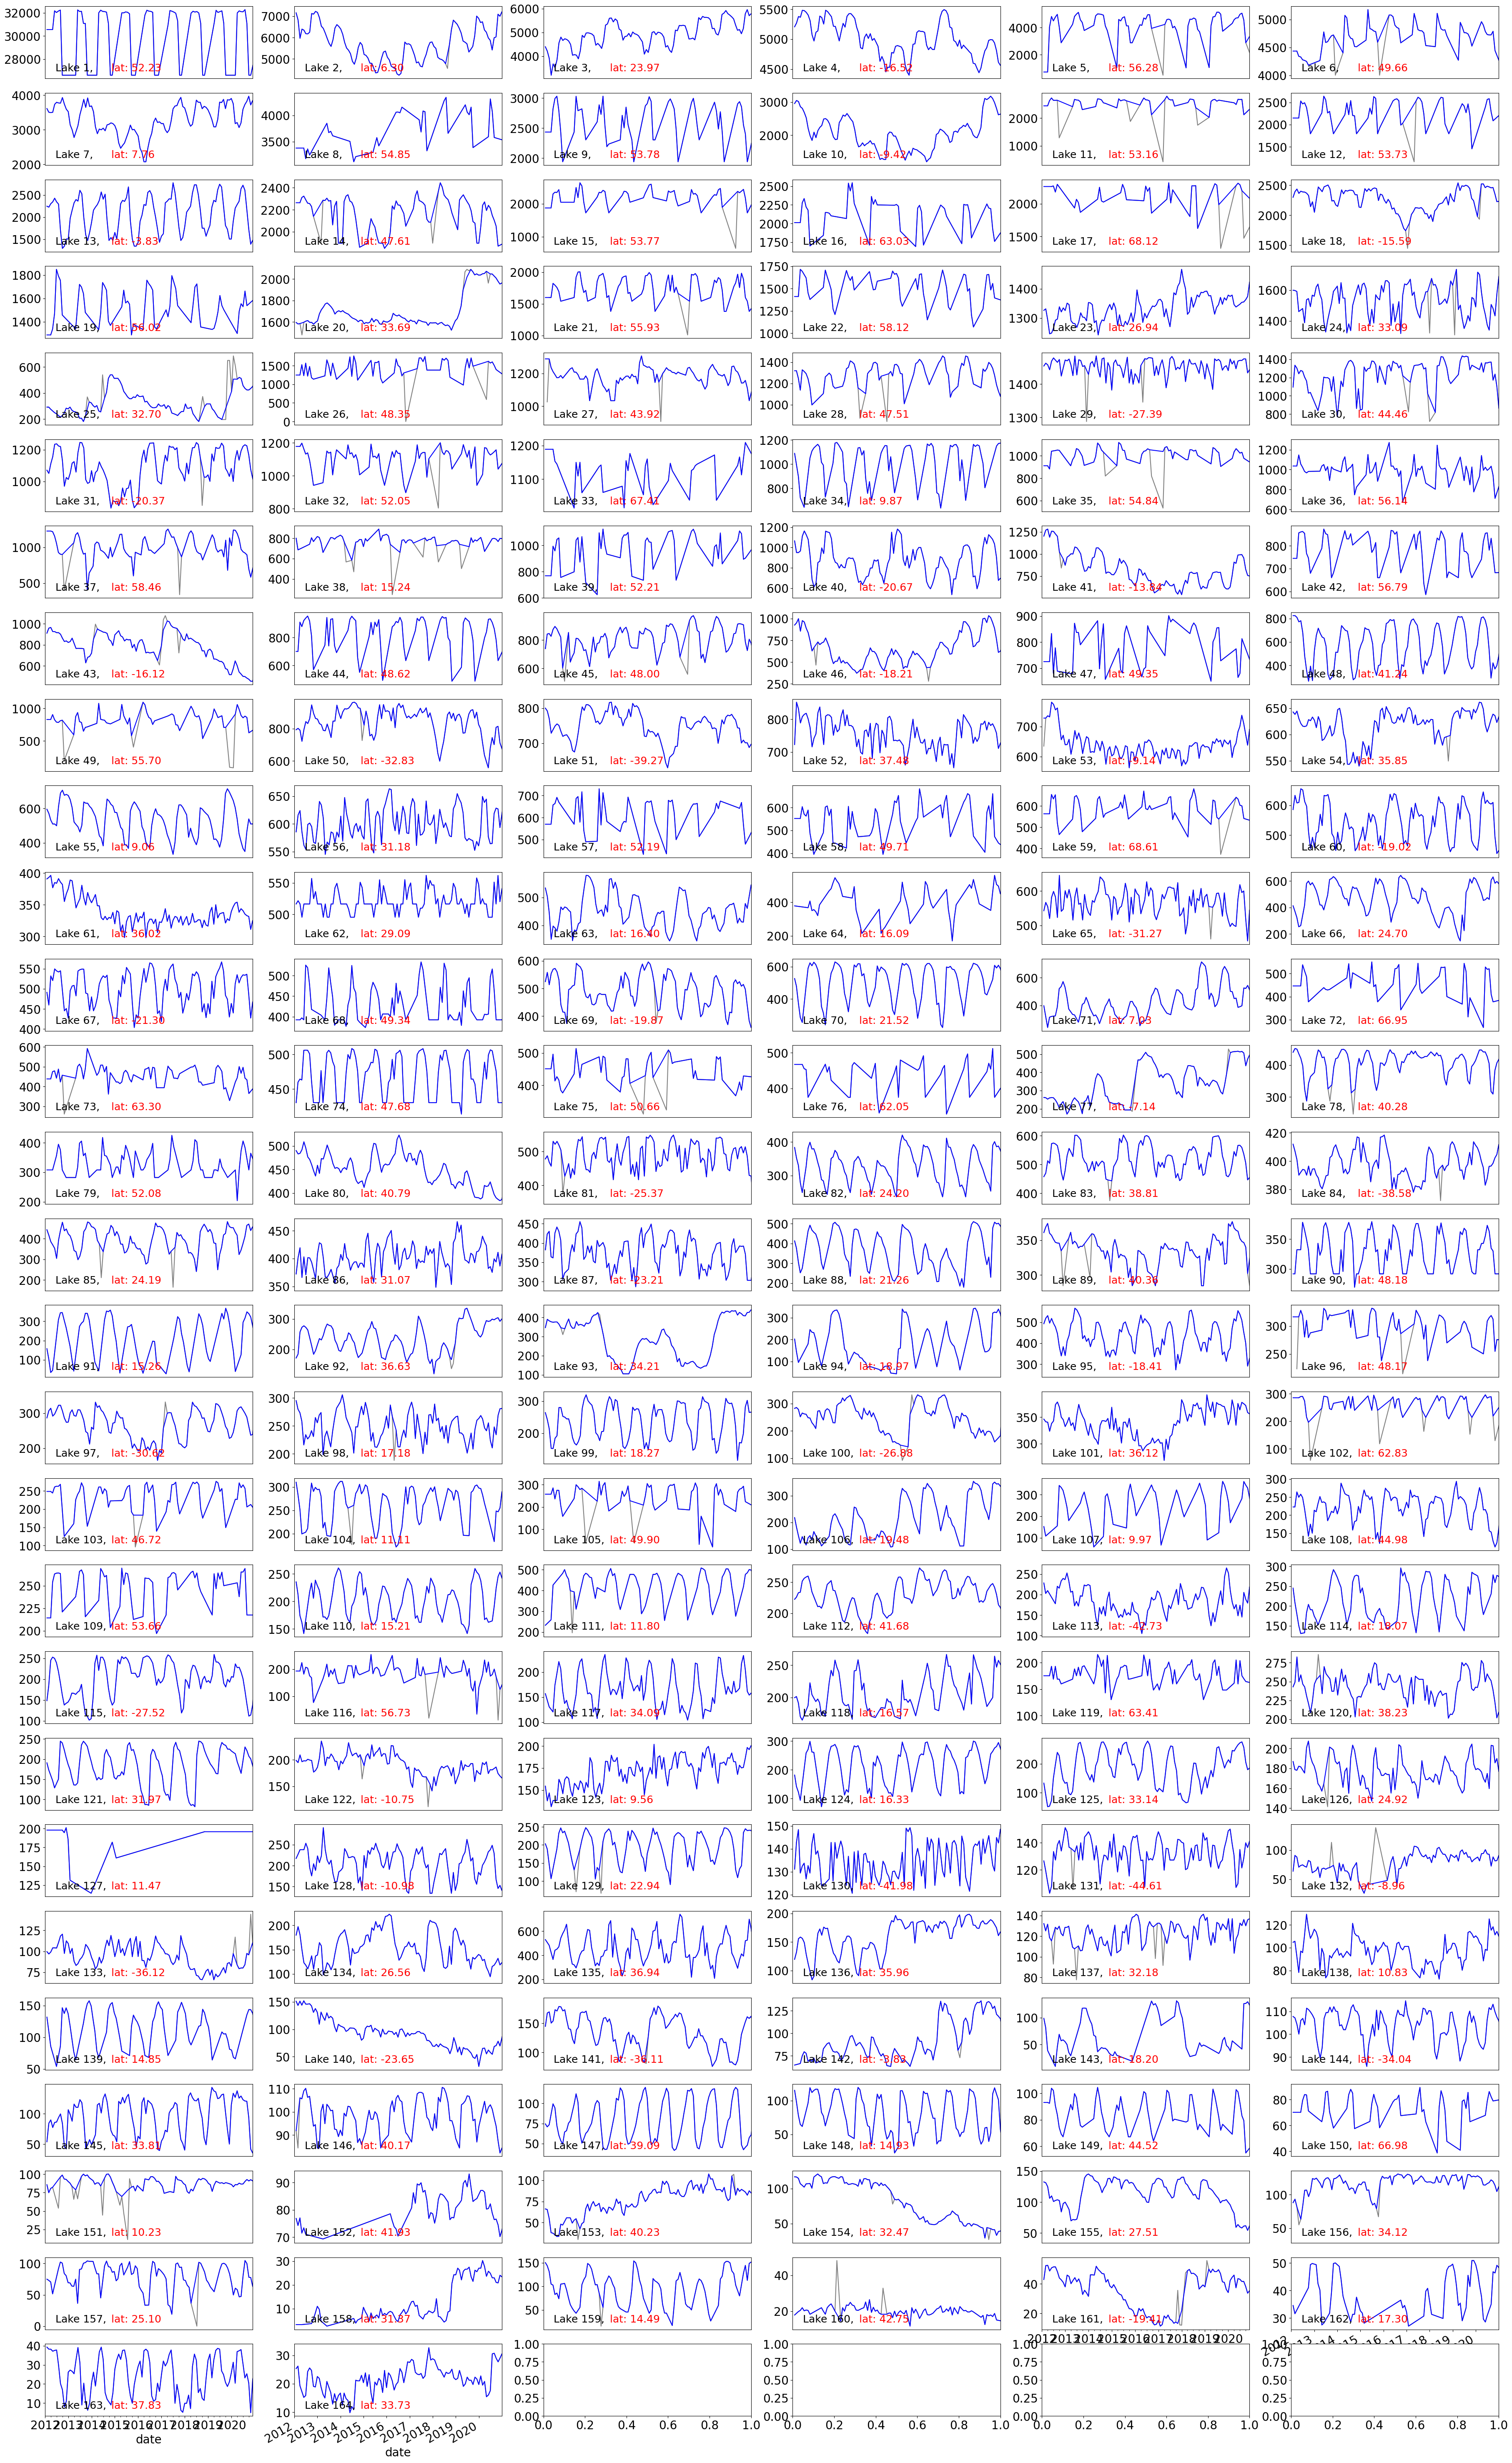

In [7]:
fig, axs = plt.subplots(28, 6, figsize=(45, 85))
axs = axs.ravel()
plt.rcParams.update({'font.size': 15})

left = datetime(2012, 1, 1)
right = datetime(2020, 12, 31)

for lake_id in sorted(df['lake_id'].astype(int).unique()):
    
    orig_data = df[df['lake_id'] == lake_id]
    lat = lake_info_data[lake_info_data['LAKE_ID'] == lake_id].iloc[0]['LAT_DD']
    orig_data = orig_data[orig_data['pge698_area'] > 0]
    orig_data.plot(ax=axs[lake_id-1], x='date', y='pge698_area', color='grey', legend=False)
    
    new_data = df_intp[df_intp['lake_ID'] == lake_id]
    new_data.plot(ax=axs[lake_id-1], x='date', y='lake_area', color='blue', legend=False)
    
    axs[lake_id-1].text(0.05, 0.10, 'Lake {:d}, '.format(lake_id), fontsize=18, color='k', transform=axs[lake_id-1].transAxes)
    axs[lake_id-1].text(0.32, 0.10, 'lat: {:.2f}'.format(lat), fontsize=18, color='r', transform=axs[lake_id-1].transAxes)
    axs[lake_id-1].set_xlim(left, right)
    if lake_id<=160:
        axs[lake_id-1].axes.get_xaxis().set_visible(False)
plt.savefig(viirs_key+'28C3_outlier_removal_area_New.png')



# 4. save outlier removed data

In [8]:
for i in range(1,165):
    df_out = df_intp[df_intp['lake_ID'] == i] 
    df_out['date'] = df_out['date'].dt.strftime('%Y%j')
    df_out.to_csv('./lakewise_extracted_outlier_removed/C3/' + str(i) +'.csv', index=False)

C:\Users\shahd\AppData\Local\Temp\ipykernel_19792\1388726014.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out['date'] = df_out['date'].dt.strftime('%Y%j')
